In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import fastf1
import fastf1.plotting
import math
from datetime import timedelta
import matplotlib as mpl

In [7]:
schedule = fastf1.get_event_schedule(2021)


In [8]:
import matplotlib as mpl
year = 2021
wknd = 9
ses = 'R'
driver = 'RIC'
colormap = mpl.cm.plasma

In [9]:
session = fastf1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

In [10]:
import numpy as np
#Now, we create a set of line segments so that we can color them individually. This creates the points as a N x 1 x 2 array so that we can stack points together easily to get the segments. The segments array for line collection needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

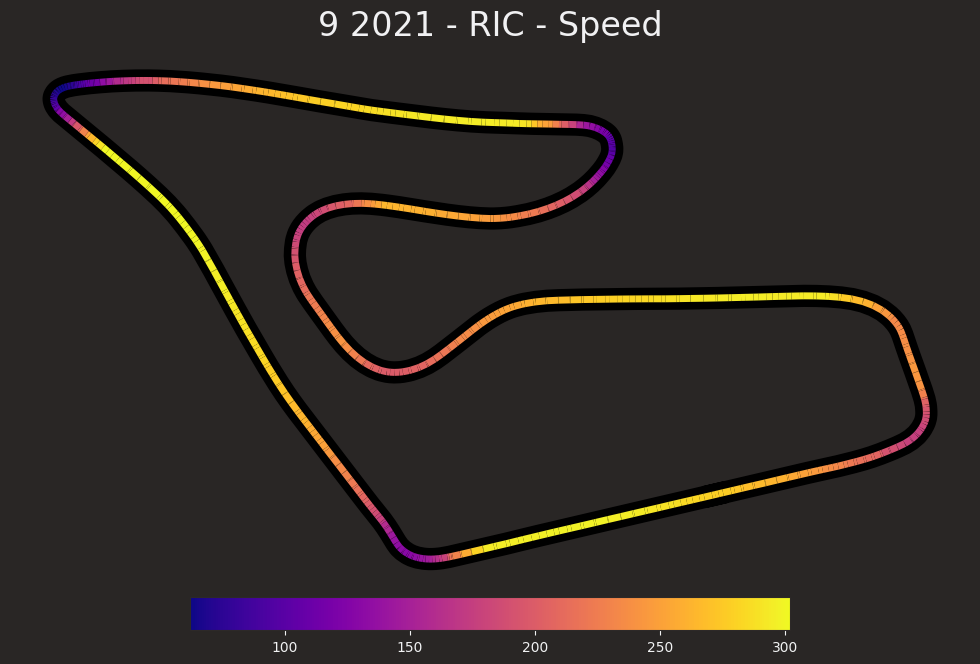

In [12]:
from matplotlib.collections import LineCollection
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()

start coding myself

In [3]:
aus_2024=fastf1.get_session(2024,'australia','r')

In [4]:
aus_2024.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v3.3.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '24', '31', '63', '44', '1']


In [5]:
alo_lap=pd.DataFrame()
rus_lap=pd.DataFrame()
for i in range(50,58):
    alo_lap_s=aus_2024.laps.pick_driver('ALO').pick_lap(i).get_telemetry()
    rus_lap_s=aus_2024.laps.pick_driver('RUS').pick_lap(i).get_telemetry()
    alo_lap_s['lapNumber']=i
    rus_lap_s['lapNumber']=i
    alo_lap=pd.concat([alo_lap,alo_lap_s])
    rus_lap=pd.concat([rus_lap,rus_lap_s])


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

In [6]:
alo_lap['drv']='ALO'
rus_lap['drv']='RUS'
pd.concat([alo_lap,rus_lap]).to_csv(r'..\..\data\processed\aus2024_ALORUS.csv')

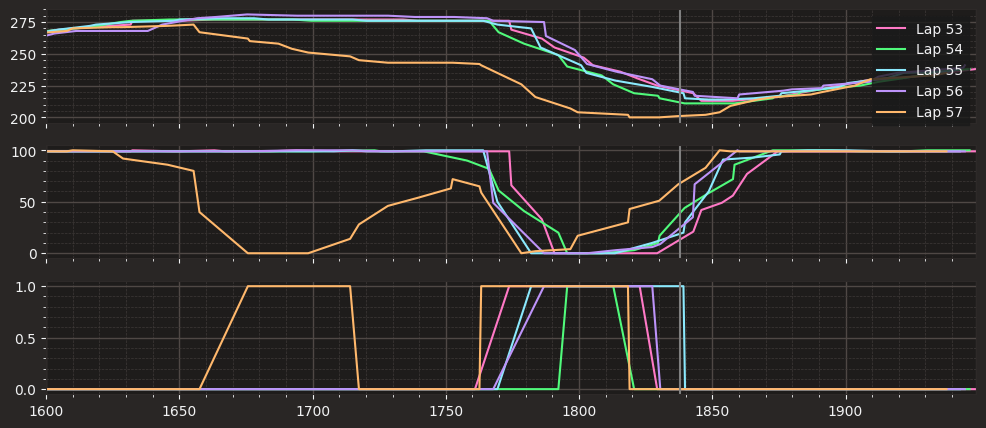

In [7]:
fastf1.plotting.setup_mpl()
alo_lap_limit=alo_lap.query('(Distance>1500) & (Distance<1949)')
fig,axs=plt.subplots(3,1,figsize=(12,5),sharex=True)
for i in range(53,58):
    axs[0].plot(alo_lap_limit[alo_lap_limit['lapNumber']==i]['Distance'],alo_lap_limit[alo_lap_limit['lapNumber']==i]['Speed'],label=f'Lap {i}')
for i,dist in enumerate(aus_2024.get_circuit_info().corners['Distance']):
    axs[0].axvline(x=dist,color='gray')
for i in range(53,58):
    axs[1].plot(alo_lap_limit[alo_lap_limit['lapNumber']==i]['Distance'],alo_lap_limit[alo_lap_limit['lapNumber']==i]['Throttle'],label=f'Lap {i}')
for i,dist in enumerate(aus_2024.get_circuit_info().corners['Distance']):
    axs[1].axvline(x=dist,color='gray')
for i in range(53,58):
    axs[2].plot(alo_lap_limit[alo_lap_limit['lapNumber']==i]['Distance'],alo_lap_limit[alo_lap_limit['lapNumber']==i]['Brake'],label=f'Lap {i}')
for i,dist in enumerate(aus_2024.get_circuit_info().corners['Distance']):
    axs[2].axvline(x=dist,color='gray')     
for ax in axs:
    ax.set_xlim([1600, 1949])  
axs[0].legend()

plt.show()

/var/folders/zk/r760srvd3r16_9wrdyh4d82w0000gn/T/ipykernel_17206/1601680988.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs2.annotate(round(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').min()[0],1),(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').idxmin(),rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').min()))
/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/matplotlib/text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError 

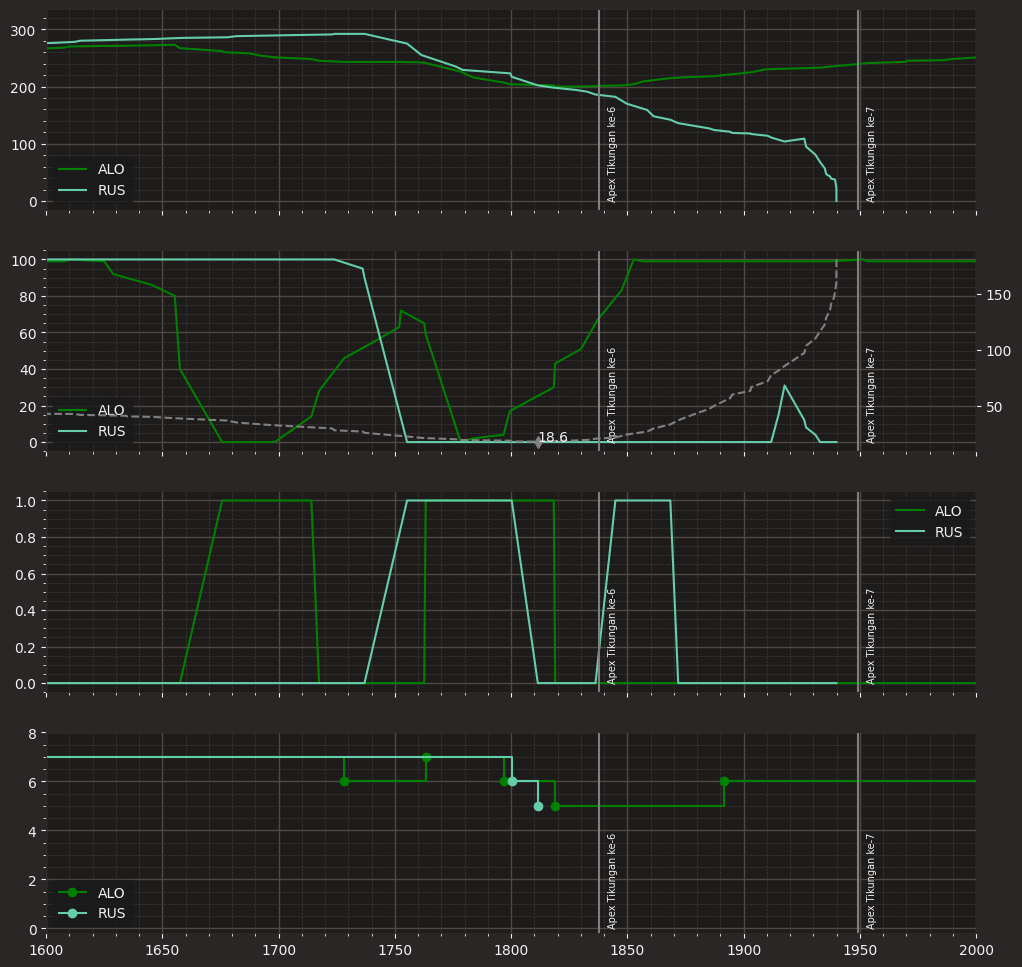

In [8]:
fastf1.plotting.setup_mpl()

fig,axs=plt.subplots(4,1,figsize=(12,12),sharex=True)
axs[0].plot(alo_lap[alo_lap['lapNumber']==57]['Distance'],alo_lap[alo_lap['lapNumber']==57]['Speed'],label=f'ALO',c='g')
axs[0].plot(rus_lap[rus_lap['lapNumber']==57]['Distance'],rus_lap[rus_lap['lapNumber']==57]['Speed'],label=f'RUS',c='mediumaquamarine')



axs[1].plot(alo_lap[alo_lap['lapNumber']==57]['Distance'],alo_lap[alo_lap['lapNumber']==57]['Throttle'],label=f'ALO',c='g')
axs[1].plot(rus_lap[rus_lap['lapNumber']==57]['Distance'],rus_lap[rus_lap['lapNumber']==57]['Throttle'],label=f'RUS',c='mediumaquamarine')
axs2=axs[1].twinx()
axs2.plot(rus_lap[rus_lap['lapNumber']==57]['Distance'],rus_lap[rus_lap['lapNumber']==57]['DistanceToDriverAhead'],label=f'Jarak ALO vs RUS',c='gray',linestyle='--')

axs2.scatter(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').idxmin(),rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').min(),marker='d',color='gray')
axs2.annotate(round(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').min()[0],1),(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').idxmin(),rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['Distance']>1600)&(rus_lap['Distance']<2000)][['Distance','DistanceToDriverAhead']].set_index('Distance').min()))
axs[2].plot(alo_lap[alo_lap['lapNumber']==57]['Distance'],alo_lap[alo_lap['lapNumber']==57]['Brake'],label=f'ALO',c='g')
axs[2].plot(rus_lap[rus_lap['lapNumber']==57]['Distance'],rus_lap[rus_lap['lapNumber']==57]['Brake'],label=f'RUS',c='mediumaquamarine')


alo_gear=pd.DataFrame(alo_lap[alo_lap['lapNumber']==57][['Distance','nGear']])
rus_gear=pd.DataFrame(rus_lap[rus_lap['lapNumber']==57][['Distance','nGear']])
alo_gear['gearShift']=alo_gear['nGear'].diff()
alo_gear.loc[2,'gearShift']=1
rus_gear['gearShift']=rus_gear['nGear'].diff()
rus_gear.loc[2,'gearShift']=1
axs[3].step(alo_gear[alo_gear['gearShift']!=0]['Distance'],alo_gear[alo_gear['gearShift']!=0]['nGear'],label=f'ALO',c='g',marker='o',where='post')
axs[3].step(rus_gear[rus_gear['gearShift']!=0]['Distance'],rus_gear[rus_gear['gearShift']!=0]['nGear'],label=f'RUS',c='mediumaquamarine',marker='o',where='post')


for ax in axs:
    for i,dist in enumerate(aus_2024.get_circuit_info().corners['Distance'].loc[aus_2024.get_circuit_info().corners['Number'].isin([6,7])]):
        ax.axvline(x=dist,color='gray')
        ax.text(dist+4, 0, f"Apex Tikungan ke-{i+6}", rotation=90, verticalalignment='bottom',fontsize=7)
    ax.set_xlim(1600,2000)
    ax.legend()
axs[3].set_ylim(-0.2,8)
    
plt.show()

/var/folders/zk/r760srvd3r16_9wrdyh4d82w0000gn/T/ipykernel_17206/836395219.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs2.annotate(round(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['SessionTime']>timedelta(hours=2,minutes=16,seconds=59))&(rus_lap['SessionTime']<timedelta(hours=2,minutes=17,seconds=9))][['Distance','DistanceToDriverAhead']].set_index('Distance').min()[0],1),
/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/matplotlib/text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/nendra/f1analytics/.venv/lib/python3.10/site-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and

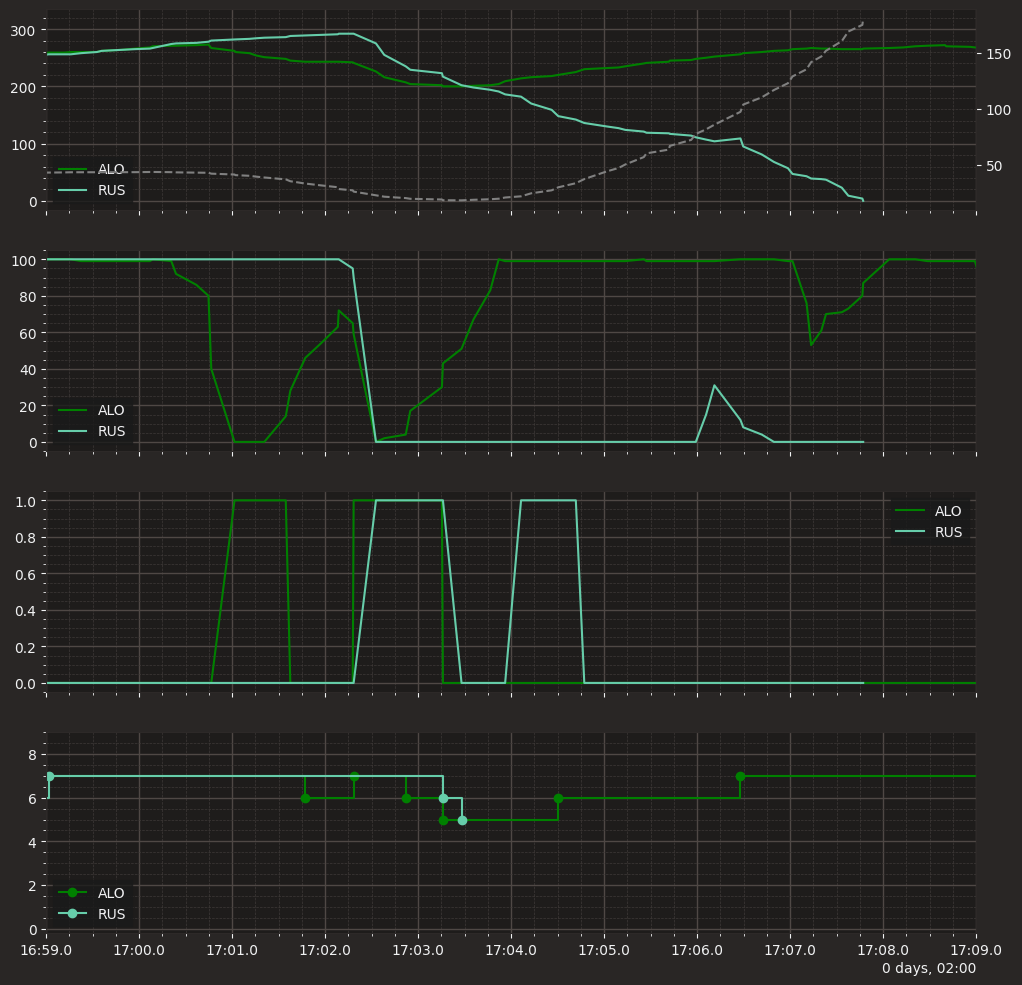

In [9]:
fastf1.plotting.setup_mpl()
from datetime import timedelta

fig,axs=plt.subplots(4,1,figsize=(12,12),sharex=True)
axs[0].plot(alo_lap[alo_lap['lapNumber']==57]['SessionTime'],alo_lap[alo_lap['lapNumber']==57]['Speed'],label=f'ALO',c='g')
axs[0].plot(rus_lap[rus_lap['lapNumber']==57]['SessionTime'],rus_lap[rus_lap['lapNumber']==57]['Speed'],label=f'RUS',c='mediumaquamarine')



axs[1].plot(alo_lap[alo_lap['lapNumber']==57]['SessionTime'],alo_lap[alo_lap['lapNumber']==57]['Throttle'],label=f'ALO',c='g')
axs[1].plot(rus_lap[rus_lap['lapNumber']==57]['SessionTime'],rus_lap[rus_lap['lapNumber']==57]['Throttle'],label=f'RUS',c='mediumaquamarine')
axs2=axs[0].twinx()
axs2.plot(rus_lap[rus_lap['lapNumber']==57]['SessionTime'],rus_lap[rus_lap['lapNumber']==57]['DistanceToDriverAhead'],label=f'Jarak ALO vs RUS',c='gray',linestyle='--')

axs2.scatter(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['SessionTime']>timedelta(hours=2,minutes=16,seconds=59))&(rus_lap['SessionTime']<timedelta(hours=2,minutes=17,seconds=9))][['Distance','DistanceToDriverAhead']].set_index('Distance').idxmin(),
             rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['SessionTime']>timedelta(hours=2,minutes=16,seconds=59))&(rus_lap['SessionTime']<timedelta(hours=2,minutes=17,seconds=9))][['Distance','DistanceToDriverAhead']].set_index('Distance').min(),
             marker='d',
             color='gray')
axs2.annotate(round(rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['SessionTime']>timedelta(hours=2,minutes=16,seconds=59))&(rus_lap['SessionTime']<timedelta(hours=2,minutes=17,seconds=9))][['Distance','DistanceToDriverAhead']].set_index('Distance').min()[0],1),
              (rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['SessionTime']>timedelta(hours=2,minutes=16,seconds=59))&(rus_lap['SessionTime']<timedelta(hours=2,minutes=17,seconds=9))][['Distance','DistanceToDriverAhead']].set_index('Distance').idxmin(),
               rus_lap[(rus_lap['lapNumber']==57)&(rus_lap['SessionTime']>timedelta(hours=2,minutes=16,seconds=59))&(rus_lap['SessionTime']<timedelta(hours=2,minutes=17,seconds=9))][['Distance','DistanceToDriverAhead']].set_index('Distance').min()))
axs[2].plot(alo_lap[alo_lap['lapNumber']==57]['SessionTime'],alo_lap[alo_lap['lapNumber']==57]['Brake'],label=f'ALO',c='g')
axs[2].plot(rus_lap[rus_lap['lapNumber']==57]['SessionTime'],rus_lap[rus_lap['lapNumber']==57]['Brake'],label=f'RUS',c='mediumaquamarine')


alo_gear=pd.DataFrame(alo_lap[alo_lap['lapNumber']==57][['SessionTime','nGear']])
rus_gear=pd.DataFrame(rus_lap[rus_lap['lapNumber']==57][['SessionTime','nGear']])
alo_gear['gearShift']=alo_gear['nGear'].diff()
alo_gear.loc[2,'gearShift']=1
rus_gear['gearShift']=rus_gear['nGear'].diff()
rus_gear.loc[2,'gearShift']=1
axs[3].step(alo_gear[alo_gear['gearShift']!=0]['SessionTime'],alo_gear[alo_gear['gearShift']!=0]['nGear'],label=f'ALO',c='g',marker='o',where='post')
axs[3].step(rus_gear[rus_gear['gearShift']!=0]['SessionTime'],rus_gear[rus_gear['gearShift']!=0]['nGear'],label=f'RUS',c='mediumaquamarine',marker='o',where='post')


for ax in axs:
    #for i,dist in enumerate(aus_2024.get_circuit_info().corners['Distance'].loc[aus_2024.get_circuit_info().corners['Number'].isin([6,7])]):
    #    ax.axvline(x=dist,color='gray')
    #    ax.text(dist+4, 0, f"Apex Tikungan ke-{i+6}", rotation=90, verticalalignment='bottom',fontsize=7)
    ax.set_xlim(timedelta(hours=2,minutes=16,seconds=59),timedelta(hours=2,minutes=17,seconds=9))
    ax.legend()
axs[3].set_ylim(-0.2,9)
    
plt.show()

In [133]:
alorus_tyre=pd.DataFrame(aus_2024.laps.pick_drivers(['ALO','RUS']))[['Driver','LapNumber','Compound','TyreLife','Stint','FreshTyre']]
alorus_tyre=alorus_tyre.drop(alorus_tyre[alorus_tyre['LapNumber']>57].index)
alorus_tyre=alorus_tyre.groupby(['Driver','Compound','Stint','FreshTyre']).agg({'LapNumber':'count','TyreLife':'max'}).sort_values(by=['Driver','Stint']).reset_index()
#alorus_tyre=alorus_tyre[['Driver','Compound']].value_counts().to_frame().reset_index()

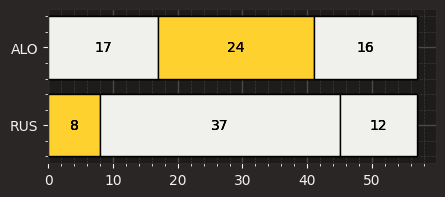

In [141]:
fig,ax=plt.subplots(figsize=(5,2))
for driver in alorus_tyre['Driver']:
    driver_stints = alorus_tyre.loc[alorus_tyre["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        bars=ax.barh(
            y=driver,
            width=row["LapNumber"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )
        
        ax.bar_label(bars, label_type='center', color='black')

        previous_stint_end += row["LapNumber"]
ax.invert_yaxis()

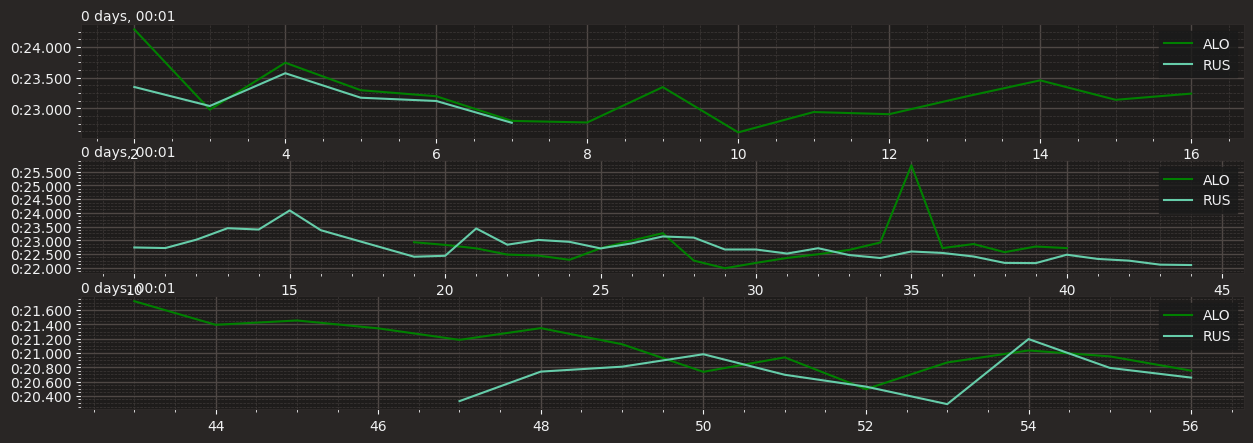

In [162]:
laptimes=aus_2024.laps.pick_wo_box().pick_accurate().pick_laps(range(2,57)).pick_drivers(['ALO','RUS'])[['Driver','LapTime','LapNumber','Compound','Stint']]
fig,ax=plt.subplots(3,1,figsize=(15,5))
for i,drv in laptimes.groupby(['Driver','Stint']):
    num=int(i[1])-1
    if i[0]=='ALO':
        color='g'
    else:
        color='mediumaquamarine'
    ax[num].plot(drv['LapNumber'],drv['LapTime'],label=i[0],c=color)
    ax[num].legend()

In [200]:
circuit_info = aus_2024.get_circuit_info()

In [22]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

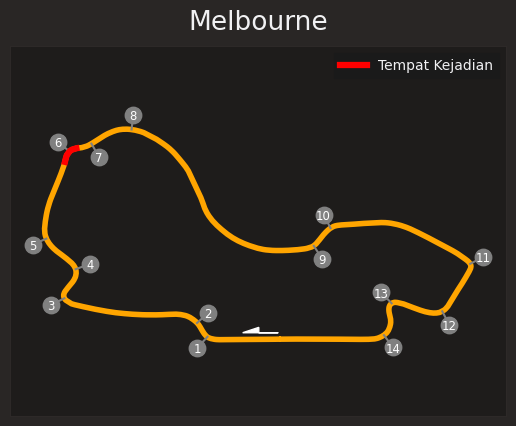

In [99]:
lap = aus_2024.laps.pick_fastest()
pos = lap.get_pos_data()
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1],linewidth=4,c='orange')

offset_vector = [700, 0]  # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')
    

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')
    


rotrack_highlight=rotated_track[(rotated_track[:,0]>-11000)&(rotated_track[:,0]<-8850)&(rotated_track[:,1]>6300)&(rotated_track[:,1]<7100)]
plt.plot(rotrack_highlight[:, 0], rotrack_highlight[:, 1],linewidth=4.5,c='red',label='Tempat Kejadian')
plt.arrow(rotated_track[0,0],rotated_track[0,1]+300,-900,0,color='white',shape='left',head_width=500)
plt.legend()

plt.title(aus_2024.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

In [32]:
rotate(aus_2024.get_circuit_info().corners.loc[:, ('X', 'Y')].to_numpy(),angle=aus_2024.get_circuit_info().rotation / 180 * np.pi)

array([[ -3455.29007904,  -1677.1795409 ],
       [ -3941.57191271,  -1036.0829158 ],
       [-10109.05216053,    110.66353072],
       [ -9584.52969254,   1462.30052579],
       [-10945.0753147 ,   2882.8065407 ],
       [ -9880.28774091,   6948.22528407],
       [ -8850.26170196,   7298.49844895],
       [ -6985.51799456,   7956.96689358],
       [  1487.08915659,   2546.75018433],
       [  2264.63517496,   3375.55029853],
       [  8757.25745857,   1712.62174071],
       [  7458.87715138,   -497.006071  ],
       [  5104.82335749,   -122.18387606],
       [  4748.71062562,  -1606.04467038]])

In [169]:
aus_alorus=pd.DataFrame(aus_2024.laps.pick_accurate().pick_wo_box()).query("Driver in ['ALO','RUS']")[['LapTime','Driver','Sector1Time','Sector2Time','Sector3Time','Compound']].melt(id_vars=['Compound','Driver','LapTime'],value_vars=['Sector1Time','Sector2Time','Sector3Time'],var_name='Sectors',value_name='Time')

<Axes: xlabel='Sectors', ylabel='Time'>

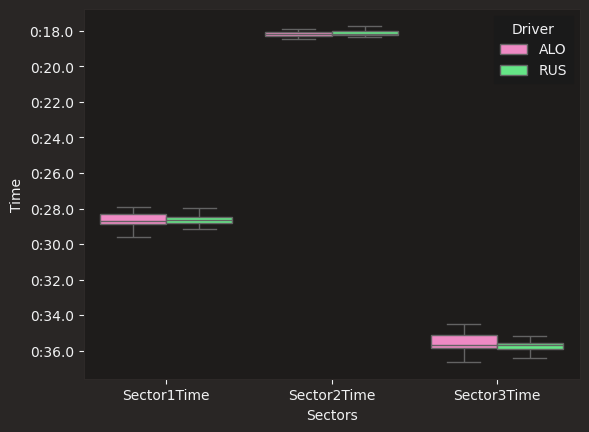

In [170]:
sns.boxplot(data=aus_alorus.query('Compound != "SOFT"'),x='Sectors',y='Time',hue='Driver',showfliers=False)

<Axes: xlabel='Compound', ylabel='LapTime'>

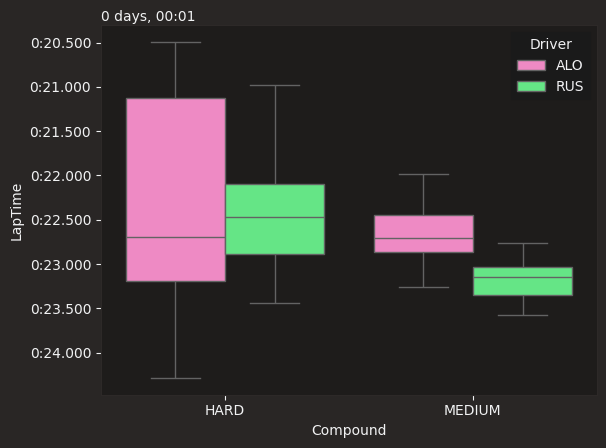

In [172]:
sns.boxplot(data=aus_alorus,x='Compound',y='LapTime',hue='Driver',showfliers=False)

#TODO: Bikin viz map speed dominance lebih simple!!!

In [173]:
hamilton_hard=pd.DataFrame()
verstappen_hard=pd.DataFrame()
for i in range(1,57):
    if (aus_2024.laps.pick_driver('ALO').pick_lap(i).Compound=='HARD').tolist()[0]:
        hamilton=pd.DataFrame(aus_2024.laps.pick_driver('ALO').pick_lap(i).get_telemetry())
        
        hamilton['LapNumber']=i #Sebaiknya gaperlu pake loop buat nambah LapNumber. Ambil LapNumber yg relevan aja. Gaperlu nambah kolom
        hamilton_hard=pd.concat([hamilton_hard,hamilton])
    
    if (aus_2024.laps.pick_driver('ALO').pick_lap(i).Compound=='HARD').tolist()[0]:
        verstappen=pd.DataFrame(aus_2024.laps.pick_driver('RUS').pick_lap(i).get_telemetry())

        verstappen['LapNumber']=i
        
        verstappen_hard=pd.concat([verstappen_hard,verstappen])


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

In [175]:
verstappen_hard=verstappen_hard.query("DRS in [0,1,2,3,8]")
hamilton_hard=hamilton_hard.query("DRS in [0,1,2,3,8]")

In [176]:
hamilton_hard['miniSect']=hamilton_hard['RelativeDistance'].apply(lambda x: int(x/(1/25)))
verstappen_hard['miniSect']=verstappen_hard['RelativeDistance'].apply(lambda x: int(x/(1/25)))

In [177]:
hamilton_hard=hamilton_hard[['Speed','miniSect']].groupby('miniSect').mean()
hamilton_hard['drv']='ALO'
hamilton_hard['drv_id']=2 #ambil nomor driver aja, harusnya bisa
verstappen_hard=verstappen_hard[['Speed','miniSect']].groupby('miniSect').mean()
verstappen_hard['drv']='RUS'
verstappen_hard['drv_id']=1


In [178]:
df=pd.concat([hamilton_hard,verstappen_hard])

In [179]:
dfSpeed=df.reset_index().sort_values('Speed').drop_duplicates(subset='miniSect', keep='last').sort_values('miniSect').reset_index(drop=True)
listProp=dfSpeed[['drv']].value_counts(normalize=True).tolist()

In [180]:
dfSpeed[['drv']].value_counts(normalize=True).tolist()

[0.56, 0.44]

In [182]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from matplotlib.collections import LineCollection

import fastf1


#session = fastf1.get_session(2021, 'Austrian Grand Prix', 'Q')
#session.load()

#lap = session.laps.pick_fastest()
#tel = lap.get_telemetry()

In [188]:
single_lap = pd.DataFrame(aus_2024.laps.pick_fastest().get_telemetry())
single_lap['miniSect']=single_lap['RelativeDistance'].apply(lambda x: int(x/(1/25)))
single_lap=single_lap.merge(dfSpeed,on='miniSect')


In [189]:
import math
def rotate_matrix (x, y, angle, x_shift=0, y_shift=0, units="DEGREES"):
    """
    Rotates a point in the xy-plane counterclockwise through an angle about the origin
    https://en.wikipedia.org/wiki/Rotation_matrix
    :param x: x coordinate
    :param y: y coordinate
    :param x_shift: x-axis shift from origin (0, 0)
    :param y_shift: y-axis shift from origin (0, 0)
    :param angle: The rotation angle in degrees
    :param units: DEGREES (default) or RADIANS
    :return: Tuple of rotated x and y
    """

    # Shift to origin (0,0)
    x = x - x_shift
    y = y - y_shift

    # Convert degrees to radians
    if units == "DEGREES":
        angle = math.radians(angle)

    # Rotation matrix multiplication to get rotated x & y
    xr = (x * math.cos(angle)) - (y * math.sin(angle)) + x_shift
    yr = (x * math.sin(angle)) + (y * math.cos(angle)) + y_shift

    return xr, yr

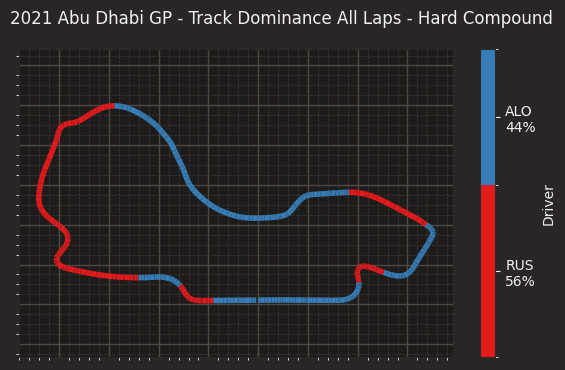

In [202]:
circRot=circuit_info.rotation
x,y=rotate_matrix(single_lap['X'].values,single_lap['Y'].values,circRot)



points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_avg=single_lap['drv_id'].to_numpy().astype(float)

cmap = colormaps['Set1'] #colormap pake yang sesuai sama warna team, pake plotting fastf1 atau bikin array
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap) #besok belajar assign colormap, sama fungsi sebenarnya dr LC
lc_comp.set_array(fastest_avg)
lc_comp.set_linewidth(4)


fig,ax=plt.subplots(figsize=(7,4))
    

fig.suptitle(
        f"2021 Abu Dhabi GP - Track Dominance All Laps - Hard Compound"
    )
        
ax.add_collection(lc_comp)
ax.axis('equal')
ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

    
bounds = [0,max(listProp)*10,10]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N-7)

cbar=fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),ax=ax,spacing='proportional', label='Driver')
cbar.set_ticks([(listProp[0]*10)/2,(listProp[0]+((1-listProp[0])/2))*10])
cbar.set_ticklabels([f'RUS\n{round(listProp[0]*100)}%', f'ALO\n{round(listProp[1]*100)}%'])#ambil driver name dari variabel!!!
plt.show()

In [ ]:
#EKSPLORASI DATA CUACA